# Pandas lab with Titanic

## 1. Pandas
Pandas is a library that helps you load the data, prepare it and perform some basic statistical analysis. The main object is the `pandas.DataFrame` - a 2d table with batteries included. 

In this lab we use `pandas` to read the data on the infamous titanic shipwreck, and answer some questions about the dataset.

__Keep running all the code cells as you read__.

### 1.1. Sample dataset
Download the data file [titanic.csv](https://docs.google.com/spreadsheets/d/1QGNxqRU02eAvTGih1t0cErB5R05mdOdUBgJZACGcuvs/edit?usp=sharing) to your local directory.

__Update the variable `file_name` in the cell below with the relative path to your local directory where you will store the datasets for this course__ and then run the cell.

In [1]:
file_name = "../../Datasets/titanic.csv"

Read a dataset into a pandas DataFrame object. Each record is indexed by a passenger id, stored in a column _PassengerId_.

In [2]:
import pandas as pd

# this creates a pandas.DataFrame
data = pd.read_csv(file_name, index_col='PassengerId')

In [3]:
# Selecting rows
head = data[:10]

head  # if you leave an expression at the end of a cell, jupyter will "display" it automatically

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


#### Some dataset variables
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender (in those ol' times when just 2 of them were allowed)
* Age - age in years, if available
* Sibsp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

### 1.2. Pandas basics

In [4]:
# table dimensions
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [5]:
# select a single row
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                 35.0
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [6]:
# select a single column.
ages = data["Age"] # alternatively: data.Age
print(ages[:10])  

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [7]:
# select several columns and rows at once
# alternatively: data[["Fare","Pclass"]].loc[5:10]
data.loc[5:10, ("Fare", "Pclass")]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


Pandas also have some basic data analysis tools. For one, you can quickly display statistical aggregates for each column using `.describe()`

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# filters
print("Only male children")
mc = data[(data['Age'] < 18) & (data['Sex'] == 'male')]
mc.head()

Only male children


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


__More pandas__: 
* A neat [tutorial](http://pandas.pydata.org/) from pydata
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html#min)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

```
```
<div style="background-color:yellow;">
    <h3>Task 1. Your turn:</h3>    
</div>



In [10]:
# select passengers number 13 and 666 - did they survive?

print(data.loc[13])
print(data.loc[666])
# They did not survive

Survived                                 0
Pclass                                   3
Name        Saundercock, Mr. William Henry
Sex                                   male
Age                                   20.0
SibSp                                    0
Parch                                    0
Ticket                           A/5. 2151
Fare                                  8.05
Cabin                                  NaN
Embarked                                 S
Name: 13, dtype: object
Survived                     0
Pclass                       2
Name        Hickman, Mr. Lewis
Sex                       male
Age                       32.0
SibSp                        2
Parch                        0
Ticket            S.O.C. 14879
Fare                      73.5
Cabin                      NaN
Embarked                     S
Name: 666, dtype: object


In [11]:
# compute the overall survival rate (what fraction of passengers survived the shipwreck)

len(data[(data['Survived'] == 1)])/len(data)

0.3838383838383838

### 1.3. Missing values
Some columns contain __NaN__ values - this means that there is no data there. For example, passenger `#6` has unknown *Age*, some others have unknown *Fare*. To simplify the data analysis, we can replace missing values by using pandas `fillna` function.

_Note: we do this only for the purpose of this tutorial. In general, you think twice before you modify data like this._

In [12]:
# Age before replacement
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                      NaN
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

In [13]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [14]:
# Age after replacement - meaning?
data.loc[6]

Survived                   0
Pclass                     3
Name        Moran, Mr. James
Sex                     male
Age                29.699118
SibSp                      0
Parch                      0
Ticket                330877
Fare                  8.4583
Cabin                    NaN
Embarked                   Q
Name: 6, dtype: object

## 2. Numpy and Pandas
### 2.1. Arrays

Almost any machine learning model requires some computationally heavy lifting often involving vectors and matrices. The raw Python is too slow and too imprecise - so instead, we use `numpy`. The main object here is `numpy.array`, which is used to represent vectors and matrices.

In [15]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print("a = ", a)
print("b = ", b)

# math and boolean operations can be applied to each element of an array
print("a + 1 =", a + 1)
print("a * 2 =", a * 2)
print("a == 2", a == 2)

# ... or corresponding elements of two (or more) arrays
print("a + b =", a + b)
print("a * b =", a * b)

a =  [1 2 3 4 5]
b =  [5 4 3 2 1]
a + 1 = [2 3 4 5 6]
a * 2 = [ 2  4  6  8 10]
a == 2 [False  True False False False]
a + b = [6 6 6 6 6]
a * b = [5 8 9 8 5]


### 2.2. Matrix/vector operations
There's also a bunch of pre-implemented operations on the entire vector/matrix: [cheatsheet](./docs/Numpy_Python_Cheat_Sheet.pdf). 

In [16]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
print("numpy.sum(a) = ", np.sum(a))
print("numpy.mean(a) = ", np.mean(a))
print("numpy.min(a) = ",  np.min(a))
print("numpy.argmin(b) = ", np.argmin(b))  # index of minimal element

# dot product - used for matrix/vector multiplication
print("numpy.dot(a,b) = ", np.dot(a, b))

print("numpy.unique(['male','male','female','female','male']) = ", np.unique(
    ['male', 'male', 'female', 'female', 'male']))

numpy.sum(a) =  15
numpy.mean(a) =  3.0
numpy.min(a) =  1
numpy.argmin(b) =  4
numpy.dot(a,b) =  35
numpy.unique(['male','male','female','female','male']) =  ['female' 'male']


### 2.3. Indexing/slicing 

In [17]:
a = np.array([0, 1, 4, 9, 16, 25])
ix = np.array([1, 2, 5])
print("a = ", a)
print("Select by index")
print("a[[1,2,5]] = ", a[ix])

a =  [ 0  1  4  9 16 25]
Select by index
a[[1,2,5]] =  [ 1  4 25]


### 2.4. Boolean operations and filters

In [18]:
print("Boolean operations")

print('a = ', a)
print('b = ', b)
print("a > 2", a > 2)
print("numpy.logical_not(a>2) = ", np.logical_not(a > 2))
print("numpy.logical_and(a>2,a<10) = ", np.logical_and(a > 2, a < 10))
print("numpy.logical_or(b<2,b>4) = ", np.logical_or(b < 2, b > 4))

print("\nSelect by boolean filter")
print("a[a > 5] = ", a[a > 5])

print("(a % 2 == 0) =", a % 2 == 0)  # True for even, False for odd
print("a[a % 2 == 0] =", a[a % 2 == 0])  # select all elements in a that are even

Boolean operations
a =  [ 0  1  4  9 16 25]
b =  [5 4 3 2 1]
a > 2 [False False  True  True  True  True]
numpy.logical_not(a>2) =  [ True  True False False False False]
numpy.logical_and(a>2,a<10) =  [False False  True  True False False]
numpy.logical_or(b<2,b>4) =  [ True False False False  True]

Select by boolean filter
a[a > 5] =  [ 9 16 25]
(a % 2 == 0) = [ True False  True False  True False]
a[a % 2 == 0] = [ 0  4 16]


### 2.5. Numpy and pandas dataframe
The important part: all this functionality works with pandas dataframes!

In [19]:
print("Max ticket price: ", np.max(data["Fare"]))
print("\nThe guy who paid the most:\n", data.iloc[np.argmax(data["Fare"])])

Max ticket price:  512.3292

The guy who paid the most:
 Survived                   1
Pclass                     1
Name        Ward, Miss. Anna
Sex                   female
Age                     35.0
SibSp                      0
Parch                      0
Ticket              PC 17755
Fare                512.3292
Cabin                    NaN
Embarked                   C
Name: 259, dtype: object


```
```
<div style="background-color:yellow;">
    <h3>Task 2. Your turn:</h3>    
</div>


In [20]:
# your code: compute mean passenger age and the data about the oldest woman on the ship
women = data[data['Sex'] == 'female']
women.iloc[np.argmax(women['Age'])]

Survived                                    1
Pclass                                      1
Name        Andrews, Miss. Kornelia Theodosia
Sex                                    female
Age                                      63.0
SibSp                                       1
Parch                                       0
Ticket                                  13502
Fare                                  77.9583
Cabin                                      D7
Embarked                                    S
Name: 276, dtype: object

In [21]:
# who on average paid more for their ticket, men or women?
mean_fare_men = np.mean(data[data['Sex'] == 'male']['Fare'])
mean_fare_women = np.mean(women['Fare'])

print(mean_fare_men, mean_fare_women)
# In general, women had higher fares

25.523893414211443 44.47981783439491


In [22]:
# who is more likely to survive: a child (<18 yo) or an adult?

child_survival_rate = np.mean(data[data['Age'] < 18]['Survived'])
adult_survival_rate = np.mean(data[data['Age'] >= 18]['Survived'])

print(child_survival_rate, adult_survival_rate)
# Children are more likely to survive in general

0.5398230088495575 0.36118251928020567


More about Pandas:
[kaggle microlesson](https://www.kaggle.com/learn/pandas)

## 3. Plots and matplotlib

Using python to visualize the data is covered by yet another library: `matplotlib`.

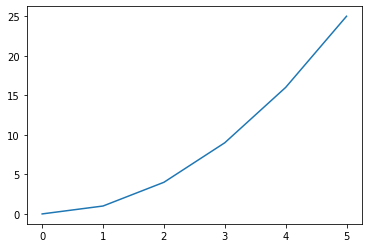

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- this "magic" tells all future matplotlib plots to be drawn inside notebook and not in a separate window.

# line plot
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])
plt.show()

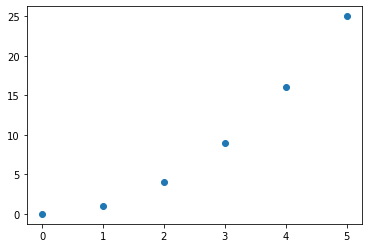

In [24]:
# scatter-plot
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

plt.show()  # show the first plot and begin drawing next one

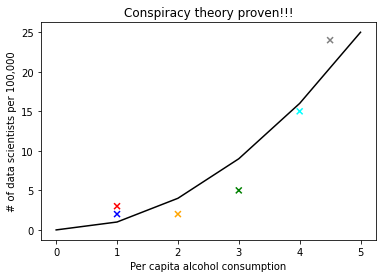

In [25]:
# draw a scatter plot with custom markers and colors
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"], marker="x")

# without .show(), several plots will be drawn on top of one another
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# adding more sugar
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# of data scientists per 100,000")

plt.show()

# fun with correlations: http://bit.ly/1FcNnWF

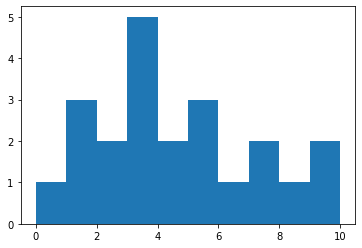

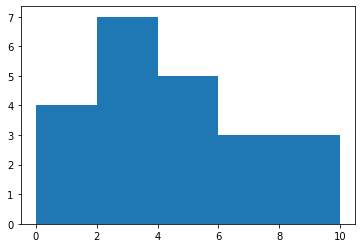

In [26]:
# histogram - showing data density
plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 9, 10])
plt.show()

plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4,
          4, 5, 5, 5, 6, 7, 7, 8, 9, 10], bins=5)
plt.show()

```
```
<div style="background-color:yellow;">
    <h3>Task 3. Your turn:</h3>    
</div>


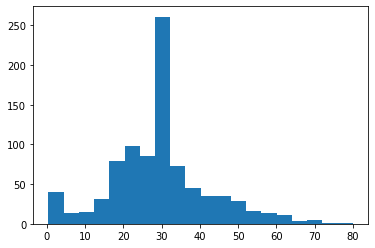

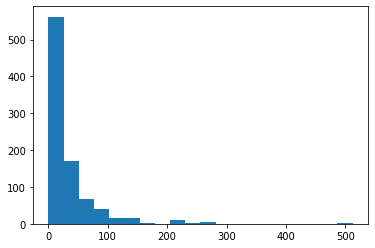

In [27]:
# plot a histogram of age and a histogram of ticket fares on separate plots

plt.hist(data['Age'], bins=20)
plt.show()

plt.hist(data['Fare'], bins=20)
plt.show()

In [28]:
# Can you do that? use tab shift-tab to see if there is a way to draw a 2D histogram of age vs fare.

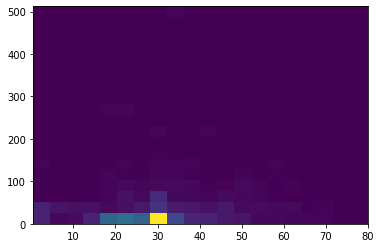

In [29]:
# make a scatter plot of passenger age vs ticket fare

plt.hist2d('Age','Fare', data=data, bins=20)
plt.show()
# Can do it, but it's more of a density plot than anything else

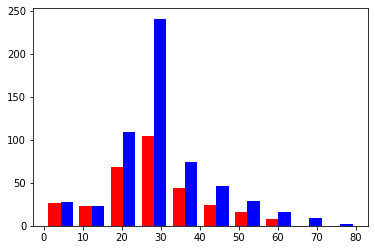

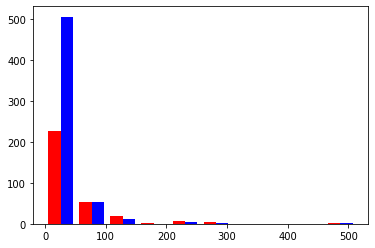

In [31]:
# Can you do that? add separate colors for men and women
female = data[data['Sex'] == 'female']
male = data[data['Sex'] == 'male']
plt.hist([female.Age,male.Age],color = ['r','b'])
plt.show()
plt.hist([female.Fare,male.Fare],color = ['r','b'])
plt.show()


#### More about charts
* Extended [tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)
* A [cheat sheet](docs/Python_Matplotlib_Cheat_Sheet.pdf)
* Other libraries for more sophisticated stuff: [Plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/)
* Also check ou this micro-lesson from kaggle: [data visualization](https://www.kaggle.com/learn/data-visualization)

### This is the end of the pandas-primer lab. 
We learned some pandas, some numpy, and some matplotlib.

Copyright &copy; 2020 Marina Barsky.